# Practical 5
## NAME:KUNAL CHOURE
## ROLL NO :42

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


#### 5A. Generate 61 points for target = sin x , where x ∈ [−3, 3]. Use this dataset to train two layer neural networks using gradient descent learning algorithm. Draw two curves with different colours, for target and output(y) of the trained neural network.

In [ ]:
# define reLU function
def relu_func(z):
    return np.maximum(0,z)

In [ ]:
x = np.linspace(-3, 3, 61)
y_true = np.sin(x) # actual y (target)
# initializing the random number generator
np.random.seed(42)

In [ ]:
# defining size of each layer
input_size = 1
hidden_size = 10
output_size = 1

In [ ]:
# initially weights (W1 & W2) are random and bias (b1 & b2) are zero
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [ ]:
learning_rate = 0.01
epochs = 1000

In [ ]:
for epoch in range(epochs):
    # forward pass
    Z1 = np.dot(x.reshape(-1, 1), W1) + b1
    A1 = relu_func(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = Z2.flatten() # predicted y
# calculating the loss
loss = np.mean((y_pred - y_true)**2)

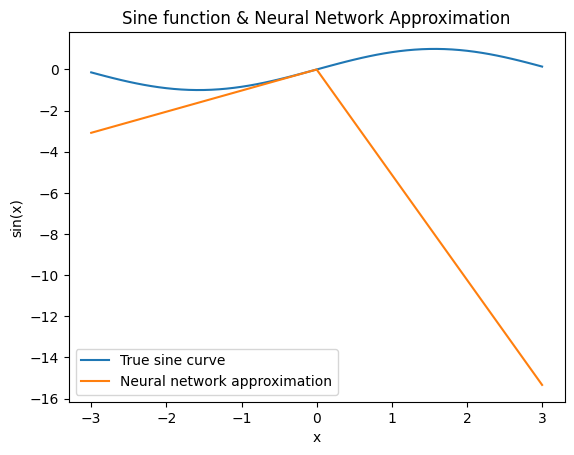

In [ ]:
plt.plot(x, y_true, label='True sine curve')
plt.plot(x, y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine function & Neural Network Approximation')
plt.show()

#### 5B. Use MNIST dataset to train neural networks using gradient descent learning algorithm.Experiments with various Architectures of neural networks, and with different activation functions for hidden and output layers.5B. Use MNIST dataset to train neural networks using gradient descent learning algorithm.Experiments with  various Architectures of neural networks, and with different activation functions for hidden and output layers.

In [ ]:
#Loading MNIST dataset from keras.datasets
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
#normalizing data

X_train = X_train/255.0
X_test = X_test/255.0
print("Data Normalized")

Data Normalized


In [ ]:
#Creating Model

def create_model(hidden_layer=1,neurons=64,activation='relu',input_shape=(28,28)):
    model = keras.Sequential();
    model.add(keras.layers.Flatten(input_shape=input_shape))   #convert 2D To 1D

    for _ in range(hidden_layer):
        model.add(layers.Dense(neurons,activation=activation))

    model.add(layers.Dense(10,activation="softmax"))
    return model

In [ ]:
model = create_model(hidden_layer=1,neurons=64,activation='relu',input_shape=(28,28))
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy",metrics=['accuracy'])
# model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy")

In [ ]:
history = model.fit(X_train,y_train,epochs = 10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7122 - loss: 1.0977 - val_accuracy: 0.9122 - val_loss: 0.3343
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8958 - loss: 0.3791 - val_accuracy: 0.9273 - val_loss: 0.2665
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9115 - loss: 0.3194 - val_accuracy: 0.9338 - val_loss: 0.2402
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9188 - loss: 0.2879 - val_accuracy: 0.9393 - val_loss: 0.2210
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9276 - loss: 0.2590 - val_accuracy: 0.9445 - val_loss: 0.2039
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9301 - loss: 0.2445 - val_accuracy: 0.9480 - val_loss: 0.1892
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9360 - loss: 0.2301 - val_accuracy: 0.9520 - val_loss: 0.1796
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9378 - loss: 0.2197 - 

In [ ]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f"Test Accuracy of model 1: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9355 - loss: 0.2152
Test Accuracy of model 1: 0.9443


### Let's change activation function of hidden layer to "sigmoid"

In [ ]:
model2 = create_model(hidden_layer=1,neurons=64,activation='sigmoid',input_shape=(28,28))
model2.compile(optimizer="sgd", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model2.fit(X_train,y_train,epochs = 10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4929 - loss: 1.9494 - val_accuracy: 0.8527 - val_loss: 1.0008
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8218 - loss: 0.9304 - val_accuracy: 0.8853 - val_loss: 0.6052
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8544 - loss: 0.6401 - val_accuracy: 0.8995 - val_loss: 0.4667
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8745 - loss: 0.5210 - val_accuracy: 0.9090 - val_loss: 0.3982
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8835 - loss: 0.4621 - val_accuracy: 0.9122 - val_loss: 0.3572
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8891 - loss: 0.4221 - val_accuracy: 0.9162 - val_loss: 0.3301
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8938 - loss: 0.3946 - val_accuracy: 0.9187 - val_loss: 0.3106
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9002 - loss: 0.3698 - 

In [ ]:
# Model evaluation
test_loss, test_accuracy = model2.evaluate(X_test,y_test)
print(f"Test Accuracy of model 2: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8958 - loss: 0.3629
Test Accuracy of model 2: 0.9111


### Let's change activation function of hidden layer to "tanh"

In [ ]:
model3 = create_model(hidden_layer=1,neurons=64,activation='tanh',input_shape=(28,28))
model3.compile(optimizer="sgd", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model3.fit(X_train,y_train,epochs = 10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7332 - loss: 1.0312 - val_accuracy: 0.9125 - val_loss: 0.3519
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8923 - loss: 0.3942 - val_accuracy: 0.9220 - val_loss: 0.2875
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9069 - loss: 0.3349 - val_accuracy: 0.9278 - val_loss: 0.2569
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9167 - loss: 0.3049 - val_accuracy: 0.9337 - val_loss: 0.2392
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9210 - loss: 0.2810 - val_accuracy: 0.9383 - val_loss: 0.2248
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9240 - loss: 0.2683 - val_accuracy: 0.9397 - val_loss: 0.2134
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9288 - loss: 0.2512 - val_accuracy: 0.9435 - val_loss: 0.2028
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9339 - loss: 0.2357 - 

In [ ]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print(f"Test Accuracy of model 3: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9355 - loss: 0.2152
Test Accuracy of model 3: 0.9443
